## Q1 
$$
\textbf{Full Conditional for } \theta:
p(\theta | \tau, \mathbf{x}) \propto f(\mathbf{x} | \theta, \tau)p(\theta).
$$
Given $p(\theta) \propto 1$, this simplifies to:
$$
\theta | \tau, \mathbf{x} \sim \mathcal{N}\left(\bar{x}, \frac{1}{n\tau}\right),
$$
where $\bar{x}$ is the sample mean.
$$
\textbf{Full Conditional for } \tau:
p(\tau | \theta, \mathbf{x}) \propto f(\mathbf{x} | \theta, \tau)p(\tau).
$$
With $p(\tau) \propto 1$, this simplifies to:
$$
\tau | \theta, \mathbf{x} \sim \text{Gamma}\left(\frac{n}{2}, \frac{1}{2} \sum_{i=1}^n (x_i - \theta)^2\right).
$$



Posterior Summary for θ:
Mean: 5.0120
95% Credible Interval: [4.58900936 5.47900019]

Posterior Summary for τ:
Mean: 0.2220
95% Credible Interval: [0.16396101 0.28910473]


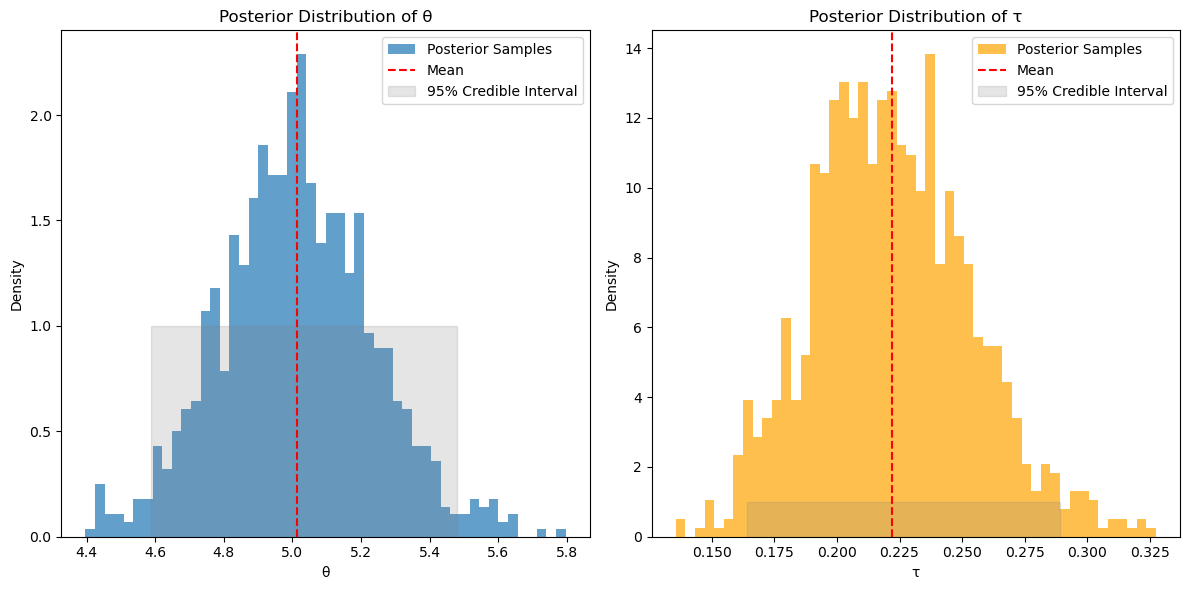

In [5]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
n=100
x = stats.norm(loc=5, scale=2).rvs(size=n)
theta_samples = []
tau_samples = []
theta = 0
tau = 1
for i in range(1000):
    tau_factor = tau * len(x)
    theta_mean = np.mean(x)
    theta_var = 1 / tau_factor
    theta = np.random.normal(theta_mean, np.sqrt(theta_var))
    theta_samples.append(theta)
    
    alpha = len(x) / 2 + 1
    beta = np.sum((x - theta) ** 2) / 2
    tau = np.random.gamma(alpha, 1 / beta)
    tau_samples.append(tau)
theta_mean = np.mean(theta_samples)
theta_credible_interval = np.percentile(theta_samples, [2.5, 97.5])
tau_mean = np.mean(tau_samples)
tau_credible_interval = np.percentile(tau_samples, [2.5, 97.5])

print("Posterior Summary for θ:")
print(f"Mean: {theta_mean:.4f}")
print(f"95% Credible Interval: {theta_credible_interval}")

print("\nPosterior Summary for τ:")
print(f"Mean: {tau_mean:.4f}")
print(f"95% Credible Interval: {tau_credible_interval}")

# Visualizations
plt.figure(figsize=(12, 6))

# Posterior for θ
plt.subplot(1, 2, 1)
plt.hist(theta_samples, bins=50, density=True, alpha=0.7, label="Posterior Samples")
plt.axvline(theta_mean, color="red", linestyle="--", label="Mean")
plt.fill_betweenx(
    y=[0, 1], 
    x1=theta_credible_interval[0], 
    x2=theta_credible_interval[1], 
    color="gray", alpha=0.2, label="95% Credible Interval"
)
plt.xlabel("θ")
plt.ylabel("Density")
plt.title("Posterior Distribution of θ")
plt.legend()

# Posterior for τ
plt.subplot(1, 2, 2)
plt.hist(tau_samples, bins=50, density=True, alpha=0.7, label="Posterior Samples", color="orange")
plt.axvline(tau_mean, color="red", linestyle="--", label="Mean")
plt.fill_betweenx(
    y=[0, 1], 
    x1=tau_credible_interval[0], 
    x2=tau_credible_interval[1], 
    color="gray", alpha=0.2, label="95% Credible Interval"
)
plt.xlabel("τ")
plt.ylabel("Density")
plt.title("Posterior Distribution of τ")
plt.legend()

plt.tight_layout()
plt.show()

## Q2
$$
\textbf{Full Conditional for } \theta:
$$
$$
p(\theta | \tau, \mathbf{x}) \propto \prod_{i=1}^n \mathcal{N}(x_i | \theta, \tau^{-1}) \cdot \mathcal{N}(\theta | \theta_0, \tau_0^{-1}).
$$
The posterior is:
$$
\theta | \tau, \mathbf{x} \sim \mathcal{N}\left(\frac{n \bar{x} \tau + \theta_0 \tau_0^{-1}}{n \tau + \tau_0^{-1}}, \frac{1}{n \tau + \tau_0^{-1}}\right).
$$

$$
\textbf{Full Conditional for } \tau:
$$
$$
p(\tau | \theta, \mathbf{x}) \propto \prod_{i=1}^n \mathcal{N}(x_i | \theta, \tau^{-1}) \cdot \text{Gamma}\left(\frac{\alpha}{2}, \frac{\lambda}{2}\right).
$$
The posterior is:
$$
\tau | \theta, \mathbf{x} \sim \text{Gamma}\left(\frac{n}{2} + \frac{\alpha}{2}, \frac{1}{2} \sum_{i=1}^n (x_i - \theta)^2 + \frac{\lambda}{2}\right).
$$


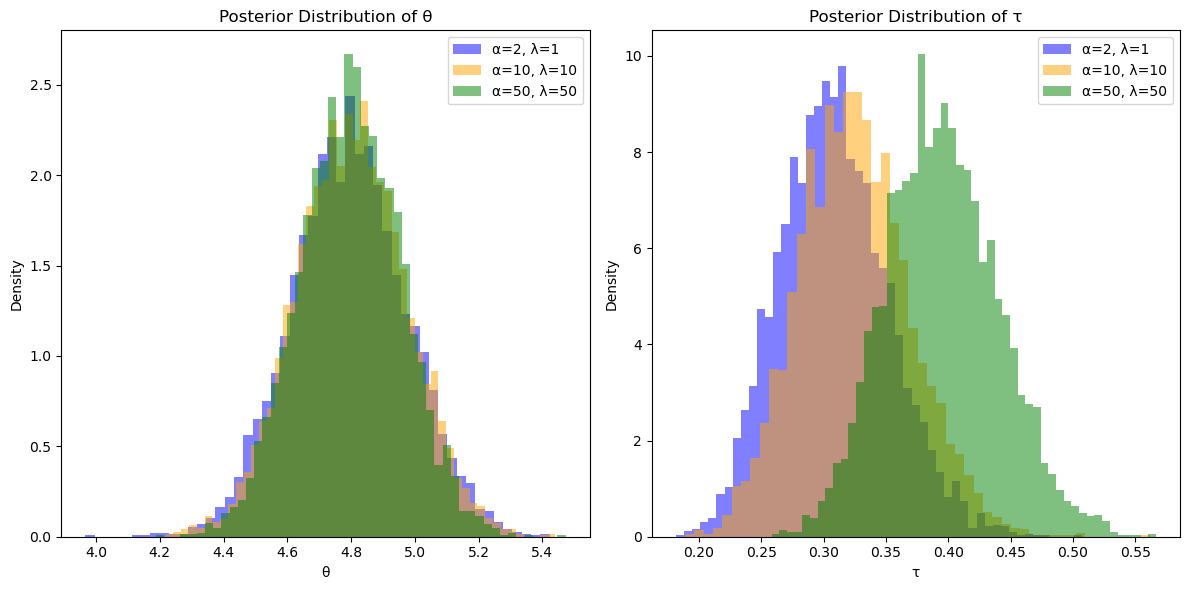

In [6]:
#Q2 derive full conditionals 
def gibbs_sampler_q2_full_inference(x, num_iterations, init_theta, init_tau, theta_0, tau_0, alpha, lambda_):
    n = len(x)
    theta_samples = []
    tau_samples = []
    theta = init_theta
    tau = init_tau

    for _ in range(num_iterations):
        # Sample theta | tau, x
        tau_factor = n * tau + 1 / tau_0
        theta_mean = (np.sum(x) * tau + theta_0 / tau_0) / tau_factor
        theta_var = 1 / tau_factor
        theta = np.random.normal(theta_mean, np.sqrt(theta_var))
        theta_samples.append(theta)

        # Sample tau | theta, x
        alpha_post = n / 2 + alpha / 2
        beta_post = 0.5 * np.sum((x - theta) ** 2) + lambda_ / 2
        tau = np.random.gamma(alpha_post, 1 / beta_post)
        tau_samples.append(tau)

    return np.array(theta_samples), np.array(tau_samples)


# Run the Gibbs sampler for different priors
np.random.seed(42)
x = np.random.normal(5, 2, 100)  # Data with mean 5, std 2
results = {}

for alpha, lambda_ in [(2, 1), (10, 10), (50, 50)]:
    theta_samples, tau_samples = gibbs_sampler_q2_full_inference(
        x, num_iterations=5000, init_theta=0, init_tau=1, 
        theta_0=5, tau_0=1, alpha=alpha, lambda_=lambda_
    )
    results[(alpha, lambda_)] = (theta_samples, tau_samples)

# Plotting the posterior distributions for different priors
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green']
labels = ["α=2, λ=1", "α=10, λ=10", "α=50, λ=50"]

for i, ((alpha, lambda_), (theta_samples, tau_samples)) in enumerate(results.items()):
    plt.subplot(1, 2, 1)
    plt.hist(theta_samples, bins=50, alpha=0.5, label=labels[i], density=True, color=colors[i])
    plt.xlabel("θ")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of θ")
    
    plt.subplot(1, 2, 2)
    plt.hist(tau_samples, bins=50, alpha=0.5, label=labels[i], density=True, color=colors[i])
    plt.xlabel("τ")
    plt.ylabel("Density")
    plt.title("Posterior Distribution of τ")

plt.subplot(1, 2, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.legend()
plt.tight_layout()
plt.show()


**Role of Hyperparameters** $(\alpha, \lambda)$:

**Posterior for** $\theta$:
$$
p(\theta | \tau, \mathbf{x}) \sim \mathcal{N}\left(\frac{n \bar{x} \tau + \theta_0 \tau_0^{-1}}{n \tau + \tau_0^{-1}}, \frac{1}{n \tau + \tau_0^{-1}}\right).
$$

**Posterior for** $\tau$:
$$
p(\tau | \theta, \mathbf{x}) \sim \text{Gamma}\left(\frac{n}{2} + \frac{\alpha}{2}, \frac{1}{2} \sum_{i=1}^n (x_i - \theta)^2 + \frac{\lambda}{2}\right).
$$

**Interpretation of** $\alpha$ **and** $\lambda$:

1. $\alpha$ controls the shape of the Gamma prior. Higher values indicate stronger prior beliefs about precision.
2. $\lambda$ scales the variance of the prior. Smaller values indicate less confidence in the prior precision.
3. The prior contributes $\alpha$ "pseudo-data points" with variance $\lambda / \alpha$.


## Q3

If the prior is proper, the posterior is proportional to the joint distribution: $ p(\theta | \mathbf{x}) \propto p(\mathbf{x},\theta)$.

$$
\textbf{Posterior Derivation for Multinomial-Dirichlet Model:}
$$

$$
\textbf{Likelihood:}
$$
$$
p(\mathbf{x} | \theta) = \binom{n}{\sum_i x_i} \theta^{\sum_i x_i} (1 - \theta)^{n - \sum_i x_i}.
$$

\textbf{Prior:}
$$
p(\theta) = \frac{\theta^{a - 1} (1 - \theta)^{b - 1}}{\text{B}(a, b)}, \quad \text{where } \text{B}(a, b) = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}.
$$

\textbf{Posterior:}
$$
p(\theta | \mathbf{x}) \propto p(\mathbf{x} | \theta)p(\theta) \propto \theta^{\sum_i x_i + a - 1} (1 - \theta)^{n - \sum_i x_i + b - 1}.
$$

The posterior is:
$$
\theta | \mathbf{x} \sim \text{Beta}(a + \sum_i x_i, b + n - \sum_i x_i).
$$



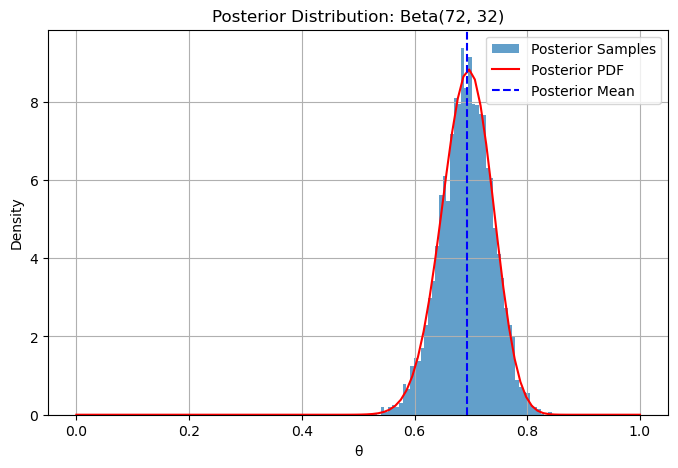

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the prior parameters and observed data
a_prior, b_prior = 2, 2  # Beta(a, b) prior
n = 100  # Number of trials
successes = 70  # Observed successes (sum of x_i)

# Posterior parameters
a_post = a_prior + successes
b_post = b_prior + n - successes

# Generate samples from the posterior
posterior_samples = np.random.beta(a_post, b_post, size=5000)

# Plot the posterior distribution
x = np.linspace(0, 1, 100)
posterior_pdf = beta.pdf(x, a_post, b_post)

plt.figure(figsize=(8, 5))
plt.hist(posterior_samples, bins=50, density=True, alpha=0.7, label="Posterior Samples")
plt.plot(x, posterior_pdf, label="Posterior PDF", color="red")
plt.axvline(np.mean(posterior_samples), color="blue", linestyle="--", label="Posterior Mean")
plt.title(f"Posterior Distribution: Beta({a_post}, {b_post})")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
